# Local binary pattern idetification 

we are taking 8 pixels such as 

     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
   
   
 Since pattern matching is using a binary scheme/methodology , this process is called binary pattern matching. 
 The lbp values we are gathering after the calculation shows the intesity of the of the each color represent in
 the picture and the scales are round up to the 256
 
     intesity to 256
     
     ^
     |
     |
     |_________ >  
         color scheme
         
From this intensity we can identify intensities

        -set of rangers which the  object lies
        -assign rangers
        -identify percentages 
   


[[[125 154 223]
  [125 154 223]
  [121 152 221]
  ...
  [121 171 243]
  [106 155 235]
  [ 61 111 193]]

 [[126 155 224]
  [123 154 223]
  [122 153 222]
  ...
  [117 163 234]
  [101 148 222]
  [ 60 109 185]]

 [[124 154 225]
  [121 153 224]
  [120 152 223]
  ...
  [133 175 240]
  [119 162 229]
  [ 83 126 193]]

 ...

 [[ 17  19  29]
  [ 18  23  32]
  [ 20  28  35]
  ...
  [ 55  77 143]
  [ 47  69 141]
  [ 46  69 144]]

 [[ 15  17  27]
  [ 18  23  32]
  [ 21  29  36]
  ...
  [ 58  80 151]
  [ 52  75 151]
  [ 53  76 156]]

 [[ 13  15  25]
  [ 17  22  31]
  [ 21  29  36]
  ...
  [ 60  82 154]
  [ 58  79 160]
  [ 60  82 164]]]
#######################
[[171 171 169 ... 187 173 130]
 [172 171 170 ... 179 165 126]
 [172 171 170 ... 190 177 141]
 ...
 [ 22  25  29 ...  94  88  89]
 [ 20  25  30 ...  99  95  97]
 [ 18  24  30 ... 101 101 104]]
##########################
[[171 171 169 ... 187 173 130]
 [172 171 170 ... 179 165 126]
 [172 171 170 ... 190 177 141]
 ...
 [ 22  25  29 ...  94  88  89

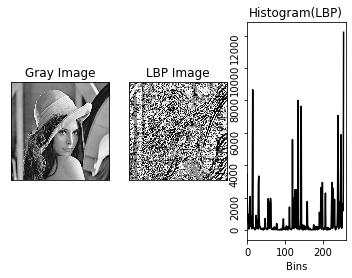

LBP Program is finished


In [21]:
import os
os.sys.path
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    '''
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    '''    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] # 1 to 8
    #power_val = [1, 32, 16, 8, 16, 32, 64, 128] # 1 to 8
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    

def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure()
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()
    
def main():
    image_file = 'lenna.jpg'
    #image_file = ''
    img_bgr = cv2.imread(image_file)
    #img_bgr = cv2.resize(img_bgr,(5,5))
    print(img_bgr)
    print("#######################")
    height, width, channel = img_bgr.shape
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    print(img_gray)
    print("##########################")
    print(img_gray)
    img_lbp = np.zeros((height, width,3), np.uint8)
    print("##########################img_lbp")
    print(img_lbp)
    for i in range(0, height):
        for j in range(0, width):
             img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) # Calculate the maximum value 
    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256]) # Calculate histogram
    output_list = []
    output_list.append({
        "img": img_gray,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Gray Image",
        "type": "gray"        
    })
    output_list.append({
        "img": img_lbp,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "LBP Image",
        "type": "gray"
    })    
    output_list.append({
        "img": hist_lbp,
        "xlabel": "Bins",
        "ylabel": "Number of pixels",
        "xtick": None,
        "ytick": None,
        "title": "Histogram(LBP)",
        "type": "histogram"
    })

    show_output(output_list)
                             
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("LBP Program is finished")

if __name__ == '__main__':
    main()